<a href="https://colab.research.google.com/github/mayconalbuquerque1/mayconalbuquerque1/blob/main/Dengue_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dengue Brasil

## Aula 3

Pandas

numpy

Seaborn

Matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_dengue = pd.read_excel('Base de Dados Dengue.xlsx')

In [ ]:
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3


In [ ]:
df_dengue.tail()

,municipio,uf,data_infeccoes,qtd_infeccoes
728767,BRASILIA,DF,2023-08-01,939
728768,BRASILIA,DF,2023-09-01,843
728769,BRASILIA,DF,2023-10-01,686
728770,BRASILIA,DF,2023-11-01,1300
728771,BRASILIA,DF,2023-12-01,5603


### Explorando o dataset

In [ ]:
df_dengue.shape

(728772, 4)

In [ ]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728772 entries, 0 to 728771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   municipio       728772 non-null  object        
 1   uf              728772 non-null  object        
 2   data_infeccoes  728772 non-null  datetime64[ns]
 3   qtd_infeccoes   728772 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.2+ MB


In [ ]:
print(f'Quantidade de linhas: {df_dengue.shape[0]}')
print(f'Quantidade de colunas: {df_dengue.shape[1]}')

Quantidade de linhas: 728772
Quantidade de colunas: 4


###Existe Valores Nulos?

In [ ]:
df_dengue.isnull().sum()

,0
municipio,0
uf,0
data_infeccoes,0
qtd_infeccoes,0


In [ ]:
print(f'Quantidade de valores nulos: {df_dengue.isnull().sum().sum()}')

Quantidade de valores nulos: 0


### Verificar os valores únicos

In [ ]:
df_dengue.nunique()

,0
municipio,5243
uf,27
data_infeccoes,132
qtd_infeccoes,1157


Precisamos calcular a quantidade de pessoas que pegaram dengue por município por ano

In [ ]:
#Criar uma coluna de ano

df_dengue ['Ano'] = df_dengue['data_infeccoes'].dt.year
df_dengue.head()

,municipio,uf,data_infeccoes,qtd_infeccoes,Ano
0,ALTA FLORESTA D'OESTE,RO,2013-01-01,34,2013
1,ALTA FLORESTA D'OESTE,RO,2013-02-01,44,2013
2,ALTA FLORESTA D'OESTE,RO,2013-03-01,15,2013
3,ALTA FLORESTA D'OESTE,RO,2013-04-01,4,2013
4,ALTA FLORESTA D'OESTE,RO,2013-05-01,3,2013


In [ ]:
infeccoes_municipio = df_dengue.groupby(['Ano', 'municipio', 'uf'])['qtd_infeccoes'].sum().reset_index()
infeccoes_municipio.head()

,Ano,municipio,uf,qtd_infeccoes
0,2013,ABADIA DE GOIAS,GO,52
1,2013,ABADIA DOS DOURADOS,MG,0
2,2013,ABADIANIA,GO,37
3,2013,ABAETE,MG,486
4,2013,ABAETETUBA,PA,15


In [ ]:
infeccoes_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60731 entries, 0 to 60730
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ano            60731 non-null  int32 
 1   municipio      60731 non-null  object
 2   uf             60731 non-null  object
 3   qtd_infeccoes  60731 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.6+ MB


Agrupar por Estado e Ano

In [ ]:
infeccoes_municipio = df_dengue.groupby(['Ano', 'uf'])['qtd_infeccoes'].sum().reset_index()
infeccoes_municipio.head()

,Ano,uf,qtd_infeccoes
0,2013,AC,1663
1,2013,AL,704
2,2013,AM,4327
3,2013,AP,546
4,2013,BA,13417


### Estastísticas Descritivas

In [ ]:
infeccoes_municipio.describe()

,Ano,qtd_infeccoes
count,297.000000,297.000000
mean,2018.000000,12872.474747
std,3.167615,31630.107741
min,2013.000000,0.000000
25%,2015.000000,780.000000
50%,2018.000000,2229.000000
75%,2021.000000,10098.000000
max,2023.000000,286000.000000


In [ ]:
infeccoes_municipio.shape

(297, 3)

#### Interpretação da estastística descritiva utilizando o gráfico Boxplot

In [ ]:
#Lista de visualização

import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-22-1037359165.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = infeccoes_municipio, x = 'Ano', y = 'qtd_infeccoes', palette = 'viridis')


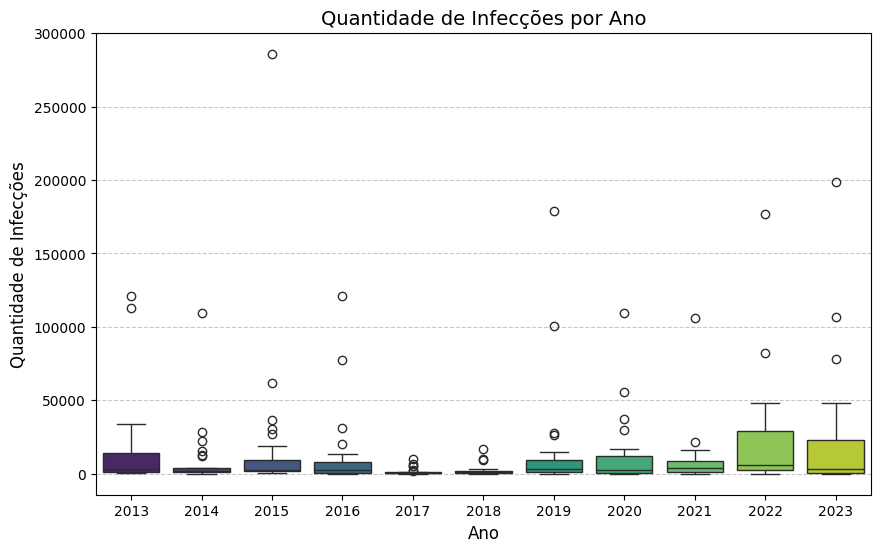

In [ ]:
#Criar boxplot comparando a quantidade de infecções por ano

plt.figure(figsize=(10, 6))
sns.boxplot(data = infeccoes_municipio, x = 'Ano', y = 'qtd_infeccoes', palette = 'viridis')

#Personalizar o gráfico

plt.title('Quantidade de Infecções por Ano', fontsize = 14)
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

#### Vamos olhar o ano de 2023

In [ ]:
#filtrar os dados para o ano de 2023

infeccoes_municipio_2023 = infeccoes_municipio [infeccoes_municipio['Ano'] == 2023]

#### Entendendo o ano de 2023

In [ ]:
infeccoes_municipio_2023.describe()

,Ano,qtd_infeccoes
count,27.0,27.000000
mean,2023.0,22902.888889
std,0.0,43368.215001
min,2023.0,0.000000
25%,2023.0,744.000000
50%,2023.0,3263.000000
75%,2023.0,22696.000000
max,2023.0,198774.000000


/tmp/ipython-input-25-3283012852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = infeccoes_municipio_2023, y = 'qtd_infeccoes', palette = 'viridis', )


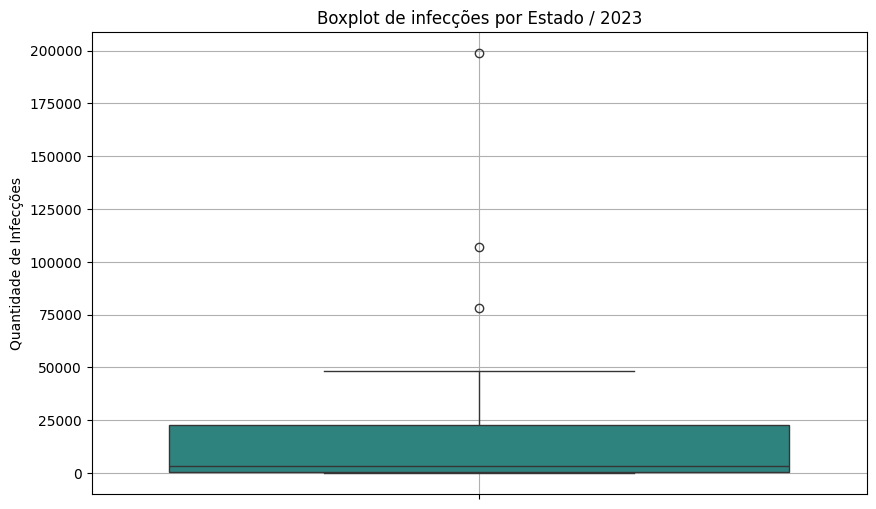

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = infeccoes_municipio_2023, y = 'qtd_infeccoes', palette = 'viridis', )
plt.title('Boxplot de infecções por Estado / 2023')
plt.ylabel('Quantidade de Infecções')
plt.grid(True)
plt.show()

In [ ]:
#lib de visualização plotly

import plotly.express as px

In [ ]:
fig = px.box(infeccoes_municipio_2023, y = 'qtd_infeccoes', title = 'Quantidade de Infecções por Estado / 2023')
fig.show()

#### Comparação, utlizar gráfico de barras

/tmp/ipython-input-28-1102291482.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




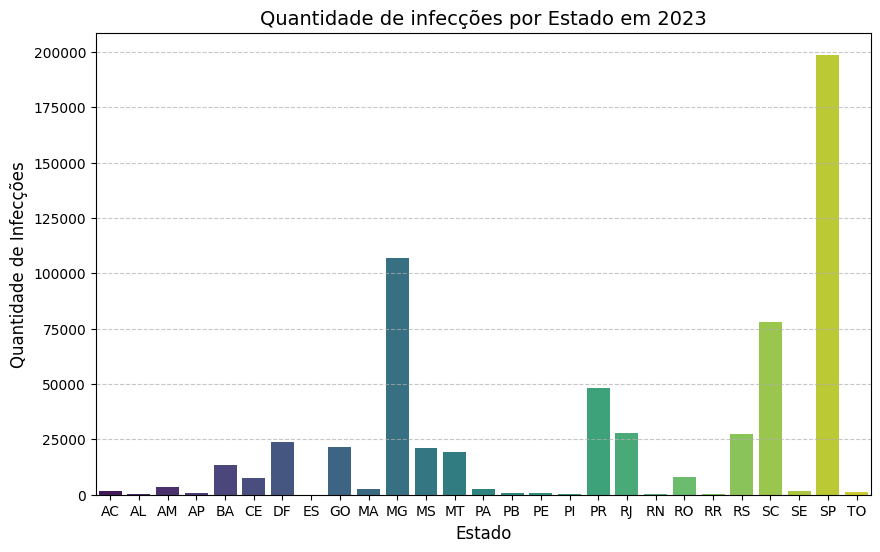

In [ ]:
# Criar gráfico de barras comparando a quantidade de infecções por estado em 2023

plt.figure(figsize = (10, 6))
sns.barplot(data = infeccoes_municipio_2023, x = 'uf', y = 'qtd_infeccoes',
palette = 'viridis')

# Personalizar o gráfico

plt.title('Quantidade de infecções por Estado em 2023', fontsize = 14)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Exibir o gráfico
plt.show()

#### Ordenar os dados do maior para o menor número de infecções

In [ ]:
infeccoes_2023 = infeccoes_municipio_2023.sort_values(by = 'qtd_infeccoes', ascending = False)

/tmp/ipython-input-30-1638079790.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




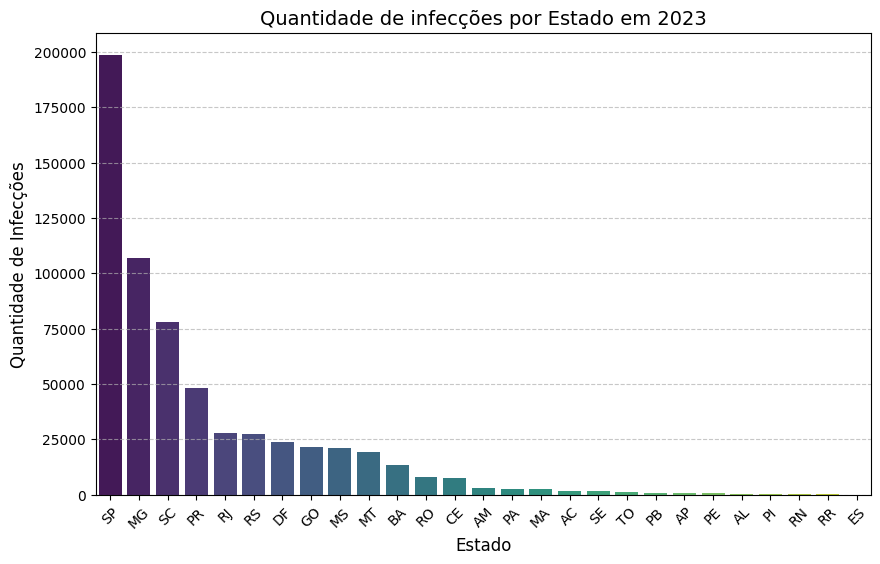

In [ ]:
# Criar um gráfico de barras comparando os estados de forma ordenada

plt.figure(figsize = (10, 6))
sns.barplot(data = infeccoes_2023, x = 'uf', y = 'qtd_infeccoes',
palette = 'viridis')

# Personalizar o gráfico

plt.title('Quantidade de infecções por Estado em 2023', fontsize = 14)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Exibir o gráfico
plt.show()

#### Gráfico de tendência

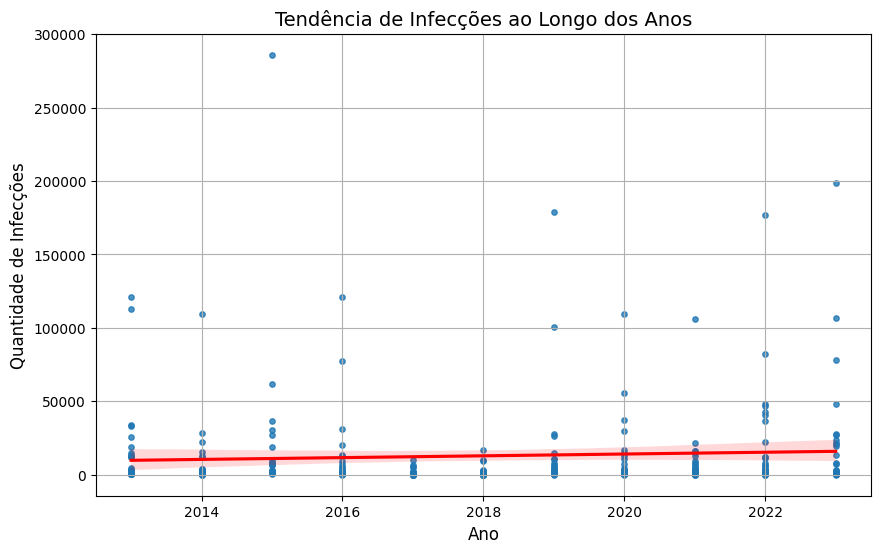

In [ ]:
# Criar o gráfico de tendência

plt.figure(figsize = (10, 6))
sns.regplot(data = infeccoes_municipio, x = 'Ano', y = 'qtd_infeccoes',
scatter_kws = {"s": 15}, line_kws = {"color": "red"})

# Personalizar o gráfico

plt.title('Tendência de Infecções ao Longo dos Anos', fontsize = 14)
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Quantidade de Infecções', fontsize = 12)
plt.grid(True)